# Basic K-Means Clustering from Scratch

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from random import sample
from keras.datasets import mnist
from sklearn.datasets import load_digits
from sklearn.manifold import TSNE
import seaborn as sns
palette = sns.color_palette("bright", 10)

D:\Anaconda\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#### Using Handwritten Digits Dataset

In [2]:
digits = load_digits()

In [3]:
X = digits.data
Y = digits.target

In [4]:
print(X.shape)
print(Y.shape)

(1797, 64)
(1797,)


#### Sample Data

<Figure size 288x288 with 0 Axes>

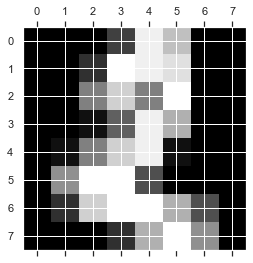

In [5]:
sns.set(rc={'figure.figsize':(4, 4)})
plt.gray() 
plt.matshow(digits.images[2]) 
plt.show() 

#### Normalize data

In [6]:
# normalize the data to 0 - 1
X = X.astype(float) / 16.

print(X.shape)
print(X[0].shape)

(1797, 64)
(64,)


In [7]:
K = 10    # No of clusters 
L = 64    # No of pixels

#### Select Initial Centroids

In [8]:
l = []
for i in range(len(X)):
    l.append(i)
    
c_ind = sample(l, 10)    # Stores data indices which will act as initial centroids

In [9]:
c_ind    # Initial centroids

[1680, 134, 495, 437, 1034, 1135, 1084, 548, 390, 291]

In [10]:
c_new = np.zeros((K, L))    # Stores K centroid values over L dimensions

In [11]:
for ind, i in enumerate(c_ind):
    for j in range(L):
        c_new[ind][j] = X[i][j]

In [12]:
c_init = np.zeros((K, L))

In [13]:
clust = []
for i in range(len(X)):
    clust.append(0)

### Main K-Means Loop

In [14]:
s = 0
    
while True:
    s += 1
    print("Iteration " + str(s) + ":")
    
    new_clust = []
    for i in range(len(X)):
        new_clust.append(0)
        
    for i in range(len(X)):
        dist = []
        for j in range(K):
            d = 0
            for l in range(L):
                d += (X[i][l] - c_new[j][l])**2
            d = math.sqrt(d)
            dist.append(d)
        
        # Find centroid with minimum distance
        md = dist[0]
        mi = 0
        for j in range(1, K):
            if dist[j] < md:
                md = dist[j]
                mi = j
        
        # Assign points to a centroid
        new_clust[i] = mi
        
    # Find new centroids
    c_init = c_new
    c_new = np.zeros((K, L))
    count = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
    
    for ind, c in enumerate(new_clust):
        count[c] += 1
        
        for j in range(L):
            c_new[c][j] += X[ind][j]
            
    for i in range(K):
        c_new[i] = c_new[i] / count[i]         
        
    print("Cluster Distributions: " + str(count))
    
    # Exit loop when clusters do not change or max iteration of 500 is reached
    if new_clust == clust or s>500:
        break
        
    clust = new_clust
    
    print("________________________________________________________________________________________________")

Iteration 1:
Cluster Distributions: [172, 149, 160, 151, 101, 184, 98, 123, 285, 374]
________________________________________________________________________________________________
Iteration 2:
Cluster Distributions: [189, 200, 137, 155, 117, 194, 87, 207, 208, 303]
________________________________________________________________________________________________
Iteration 3:
Cluster Distributions: [185, 234, 188, 147, 125, 197, 101, 232, 175, 213]
________________________________________________________________________________________________
Iteration 4:
Cluster Distributions: [192, 249, 194, 146, 140, 203, 105, 257, 166, 145]
________________________________________________________________________________________________
Iteration 5:
Cluster Distributions: [198, 235, 176, 150, 158, 211, 102, 264, 163, 140]
________________________________________________________________________________________________
Iteration 6:
Cluster Distributions: [183, 220, 176, 153, 159, 214, 106, 262, 152, 

Cluster Distributions: [163, 158, 178, 173, 152, 204, 172, 244, 172, 181]
________________________________________________________________________________________________
Iteration 47:
Cluster Distributions: [163, 158, 178, 173, 152, 204, 172, 244, 172, 181]


In [15]:
# for i in range(K):
#     print("\nCluster " + str(i))
#     print("---------------------------------")
#     for j, c in enumerate(clust):
#         if c == i:
#             print(Y[j])

In [16]:
Y_pred = []
for j, c in enumerate(clust):
    Y_pred.append(c)

In [17]:
YY = np.array(Y_pred)
YY.shape

(1797,)

In [18]:
# cp = 0
# v = [1, 7, 9, 5, 3, 0, 4, 2, 8, 6]
# for i in range(K):
#     for j, c in enumerate(clust):
#         if c == i:
#             if Y[j] == v[i]:
#                 cp += 1
# acc = cp / 1797.
# print(acc)

In [19]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

#### Use t-sne to reduce dimension to 2D

In [20]:
XX_embedded = TSNE(n_components=2, random_state=29).fit_transform(X)
XX_embedded.shape

(1797, 2)

### Plot Predicted Clusters

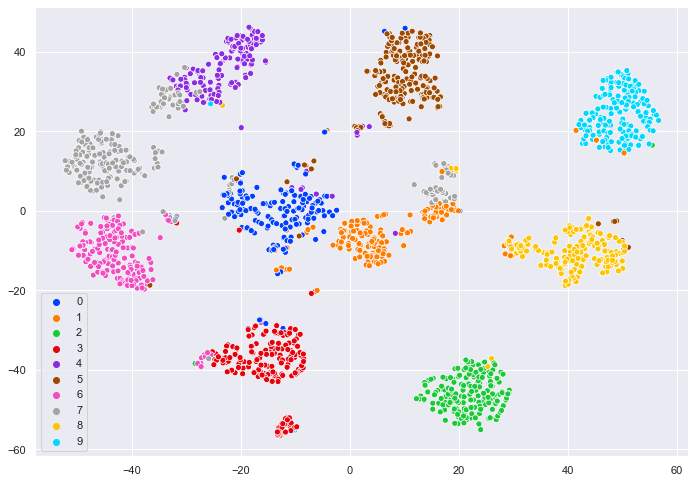

In [21]:
sns.scatterplot(XX_embedded[:,0], XX_embedded[:,1], hue=YY, legend='full', palette=palette)

###  Plot Actual Clusters

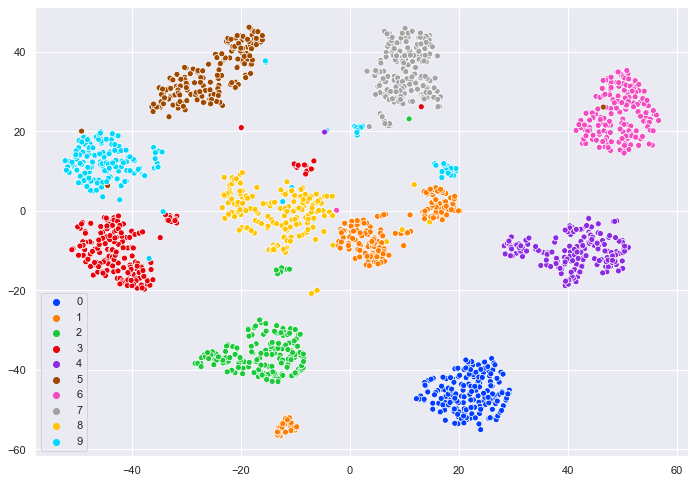

In [22]:
sns.scatterplot(XX_embedded[:,0], XX_embedded[:,1], hue=Y, legend='full', palette=palette)